# Introdução
## Descrição do relatório
O presente relatório é objetiva analisar e discutir os dados presentes na base de dados cuja origem é um *marketplace* de compra e venda de carros.

## Principais discussões
No relatório é possível encontrar diferentes seções, listadas abaixo:
- Importação e validação dos dados
- Estatísticas descritivas
    - Contagem de número de carros na base de dados por tipo
    - Distribuição de preços e preço médio dos carros da base de dados
    - Distribuição de preços e preço médio por tipo de carro
    - Porcentagem de carros com os features diferenciais
- Análise exploratória dos dados
    - Hipóteses de negócio
        - Hipótese 1 | Carros blindados e o preço de revenda
        - Hipótese 2 | Serviço de entrega e variação de preço
        - Hipótese 3 | Veículos de único dono e revisão
    - Perguntas de negócio
        - Melhor estado para se vender um carro de marca popular
        - Melhor estado para se comprar picape automática
        - Melhor estado para se comprar carro que esteja na garantia de fábrica

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_context('notebook')
sns.set_style('white')

In [3]:
#Ler arquivo tsv
cars = pd.read_csv('datasets/cars_train.csv', engine='python',encoding='utf-16', sep=None)
display(cars.info())
display(cars.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

None

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [4]:
for col in cars.columns:
    print(f'Valores distintos em {col}: ' + str(len(pd.unique(cars[col]))))

Valores distintos em id: 29584
Valores distintos em num_fotos: 15
Valores distintos em marca: 40
Valores distintos em modelo: 457
Valores distintos em versao: 1916
Valores distintos em ano_de_fabricacao: 35
Valores distintos em ano_modelo: 17
Valores distintos em hodometro: 26004
Valores distintos em cambio: 7
Valores distintos em num_portas: 3
Valores distintos em tipo: 7
Valores distintos em blindado: 2
Valores distintos em cor: 7
Valores distintos em tipo_vendedor: 2
Valores distintos em cidade_vendedor: 575
Valores distintos em estado_vendedor: 25
Valores distintos em anunciante: 4
Valores distintos em entrega_delivery: 2
Valores distintos em troca: 2
Valores distintos em elegivel_revisao: 1
Valores distintos em dono_aceita_troca: 2
Valores distintos em veiculo_único_dono: 2
Valores distintos em revisoes_concessionaria: 2
Valores distintos em ipva_pago: 2
Valores distintos em veiculo_licenciado: 2
Valores distintos em garantia_de_fábrica: 2
Valores distintos em revisoes_dentro_agen

In [5]:
#Lista vazia para adicionar as colunas que têm NaN como valor para "falso"
binary = []
#Selecionar as colunas que têm 2 valores únicos e pelo menos 1 valor nulo
for col in cars.columns:
    if (len(pd.unique(cars[col])) <= 2) and (cars[col].isna().sum() !=0) :
        binary.append(col)
binary

['dono_aceita_troca',
 'veiculo_único_dono',
 'revisoes_concessionaria',
 'ipva_pago',
 'veiculo_licenciado',
 'garantia_de_fábrica',
 'revisoes_dentro_agenda',
 'veiculo_alienado']

### Alteração de `dtype`

As colunas com até 2 valores distintos e com pelo menos um valor nulo podem ser classificados como binários. Fazendo a alteração para um valor numérico, a análise estatística fica facilitada.

In [6]:
cars_binary = cars.copy()
#Altera os valores nulos para 0 e não nulos para 1
for col in binary:
    cars_binary[col] = cars_binary[col].notnull().astype('int')
cars_binary['elegivel_revisao'] = cars_binary['elegivel_revisao'].astype('int')
cars_binary['blindado'] = cars_binary['blindado'].map({'S':1,'N':0})
cars_binary.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,blindado,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.0,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.0,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,0.008383,0.0,0.741009,0.352319,0.310032,0.664515,0.537655,0.147546,0.199770,0.0,1.330239e+05
std,3.487334,4.062422,2.673930,32561.769309,0.338360,0.091175,0.0,0.438088,0.477701,0.462514,0.472168,0.498588,0.354655,0.399834,0.0,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.359813e+06


---
# Estatísiticas descritivas
Essa seção do relatório tem como objetivo apresentar as principais estatísticas relacionadas à base de dados de compra e venda de automóveis.
### Métricas
Serão apresentadas as seguintes métricas:
- <b>Contagem de número de carros na base de dados por tipo</b>
    - Essa métrica tem como finalidade descrever e representar a frequência de cada tipo de carro na base de dados do marketplace. Há uma clara diferença no número de carros do tipo Sedã em relação aos outros tipos de carro, há 4x mais sedãs do que o segundo e o terceiro tipos mais frequentes de carros, que são o Hatchback e Picape, respectivamente. 
- <b>Distribuição de preços e preço médio dos carros da base de dados</b>
    - A métrica foi selecionada para representar o estado de distribuição de preços dos carros da base de dados. O resultado mostrou que há uma grande variação de preço entre os 25% mais caros. O preço médio encontrado foi de R\$133.023,88, que condiz com a faixa de preço mais frequente na distribuição
- <b> Distribuição de preços e preço médio por tipo de carro</b>
    - Essa métrica representa, para cada tipo de carro, a distribuição de preços, a fim de identificar em quais tipos há a maior variação de preço e qual tipo de carro tem os preços médio dos carros mais alto. Indentificou-se que utilitários esportivos e picapes têm os carros com os valores mais distribuidos e mais altos. Os carros do tipo Cupê apresentam o maior preço médio entre as 7 categorias presentes na base dados, com um valor médio dos carros de R\$413.260,36
- <b>Porcentagem de carros com os features diferenciais</b>
    - As features cuja resposta pode ser apenas "Sim" ou "Não" são de muita importância para a caracterização do veículo e podem ser diferenciais na tomada de decisão de compra do cliente final. A métrica foi selecionada para descrever a cenário de diferenciais na base de dados. A feature menos exclusiva (com aprox. 74% dos carros tendo essa opção) foi o dono aceitar ou não troca, a feature mais exclusiva (com apenas aprox. 1% dos carros tendo essa opção) foi a blindagem no carro.

<b>Os resultados das descrições estatísticas e os passos utilizados até a representação gráfica de cada uma delas estão descritos abaixo.</b>

---

### Contagem de número de carros na base de dados por tipo
Para a representação da contagem de número de carros por tipo, utilizou-se um gráfico do tipo `countplot()` da biblioteca seaborn.

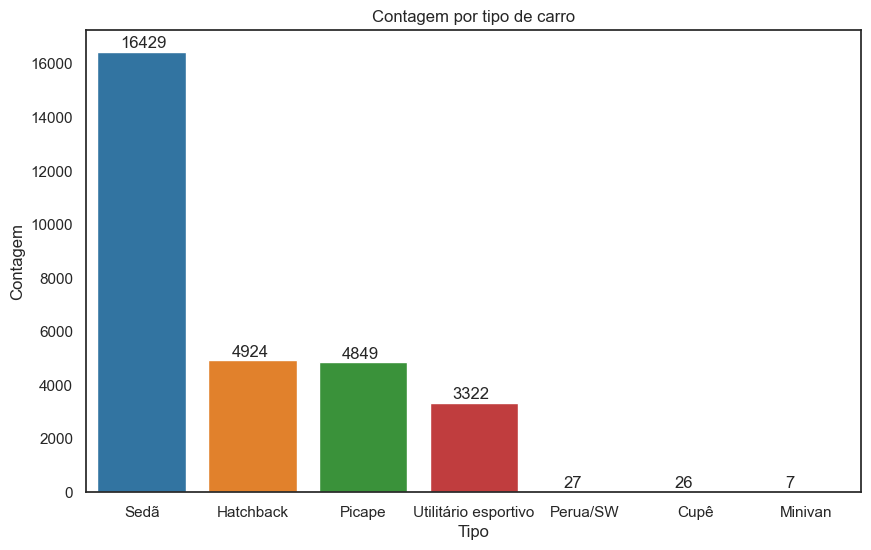

In [7]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="tipo",
                   data=cars,
                   order=cars['tipo'].value_counts().index
                   )
#Adiciona ao gráfico as contagens de cada tipo
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.21, p.get_height()+150))
plt.ylabel('Contagem')
plt.xlabel('Tipo')
plt.title('Contagem por tipo de carro')
plt.show()

### Distribuição de preços e descrição dos preços dos carros da base de dados
Para a representação da distribuição de preços, utilizou-se um gráfico do tipo `histplot()` da biblioteca seaborn. Os preços mais caro, mais barato e médio foram obtidos a partir da funções `max()`, `min()` e `mean()` da biblioteca pandas.

Valor do carro mais caro: R$1359812.89
Valor do carro mais barato: R$9869.95
Preço médio dos carros: R$133023.88


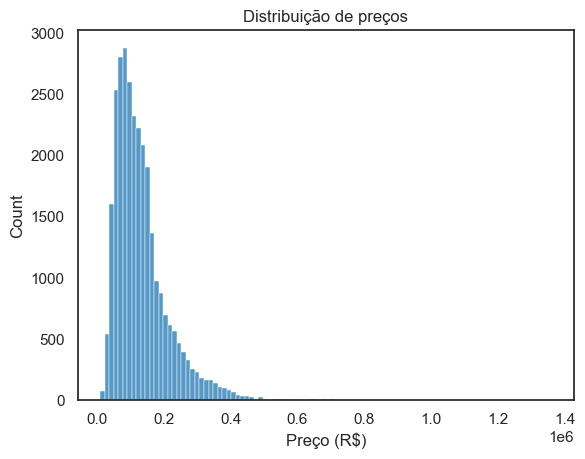

In [8]:
sns.histplot(data=cars,
            x='preco',
            bins=100
            )
print(f'Valor do carro mais caro: R${round(cars.preco.max(),2)}')
print(f'Valor do carro mais barato: R${round(cars.preco.min(),2)}')
print(f'Preço médio dos carros: R${round(cars.preco.mean(),2)}')
plt.xlabel('Preço (R$)')
plt.title('Distribuição de preços')
plt.show()

### Distribuição de preços e preço médio por tipo de carro
Para a representação da distribuição de preços, utilizou-se um gráfico do tipo `boxplot()` da biblioteca seaborn. Os preços médios de cada tipo foram obtidos com o uso da função `mean()` da biblioteca pandas dentro de um loop na lista de tipos diferentes de carro. 

Preço médio de Sedã : R$118191.94
Preço médio de Picape : R$158906.21
Preço médio de Utilitário esportivo : R$226122.99
Preço médio de Hatchback : R$92955.62
Preço médio de Perua/SW : R$110059.51
Preço médio de Cupê : R$413260.36
Preço médio de Minivan : R$65217.05


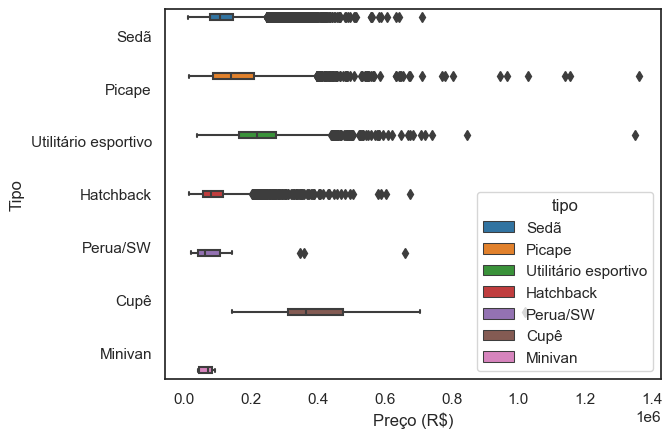

In [9]:
sns.boxplot(data=cars,
            x='preco',
           hue='tipo',
           y='tipo')
for t in cars.tipo.unique():
    print(f'Preço médio de {t} : R${round(cars[cars["tipo"]==t]["preco"].mean(),2)}')
plt.xlabel('Preço (R$)')
plt.ylabel('Tipo')
plt.show()

### Porcentagem de carros com os features diferenciais
Para a representação porcentaem de carros com features diferencias, utilizou-se um gráfico do tipo `barh` da biblioteca pandas.
Foi necessário realizar mais operações de transformação de dados para a realização dessa etapa, descrevem-se:
1. Seleção das colunas do DataFrame original que têm respostas "Sim" ou "Não"
2. Para colunas binárias, a média representa a fração decimal de respostas com valor 1. Criação de novo DataFrame com as features e a média dos valores binários (Sim = 1 e Não = 0)
3. Criação de uma nova coluna com os valores decimais multiplicados por 100 para representação percentual
4. Ordenamento crescente para melhorar a representação gráfica
5. Plotagem do gráfico com função `plot()` da biblioteca pandas. A escolha de se utilizar um gráfico de barras horizontais foi feita para facilitar a visualização e compreensão do gráfico 

In [10]:
#Selecionar apenas as colunas binárias do df
binario = cars_binary.columns[17:28]
#Iniciar dicionário para preços médios
medias = {}
for b in binario:
    medias[b] = cars_binary[b].mean() #Para cada coluna, adicionar ao dicionário o par {coluna:média da coluna}
medias['blindado'] = cars_binary.blindado.mean()#Fazer o mesmo para a única coluna binária fora do intervalo
#Cria df com base no dicionário
medias_df = pd.DataFrame.from_dict(medias, orient='index')
#Tirar o nome das features do index e alterar os nomes da colunas
medias_df.reset_index(inplace=True) 
medias_df.rename({'index':'feature',0:'decimal'}, axis=1,inplace=True)
#Cria nova coluna para utilização na representação gráfica
medias_df['porcentagem'] = medias_df['decimal']*100

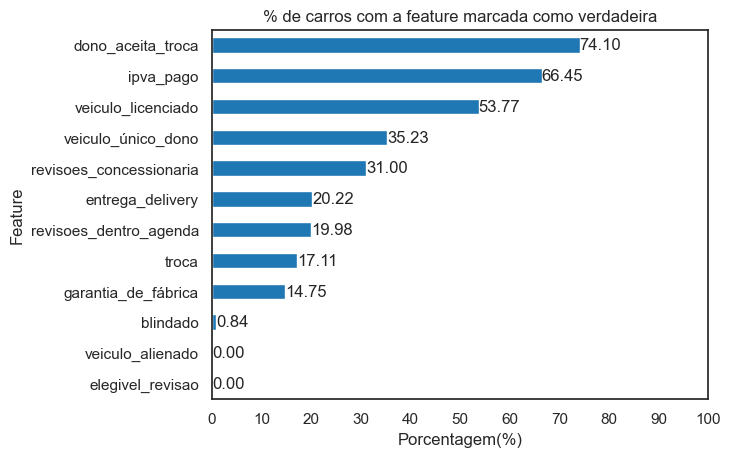

In [11]:
#Plotar gráfico em ordem decrescente
ax = medias_df\
    .sort_values(by='porcentagem', ascending=True)\
    .plot(x='feature',
          y='porcentagem',
          kind='barh',
          title='% de carros com a feature marcada como verdadeira',
          ylabel='Feature',
          xlabel='Porcentagem(%)',
          legend=False
          )
#Mudar de decimal para porcentagem
xtick_per = np.arange(0,110,10)
xlabel_per = np.arange(0,110,10)
plt.xticks(ticks=xtick_per, labels=xlabel_per)
#Colocar label nas barras
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

# Análise exploratória dos dados
## Hipóteses de negócio
3 hipóteses de mercado serão criadas e validadas:
1. Carros blindados têm um preço de revenda maior do que carros não blindados da mesma categoria.
2. O serviço de entrega do carro não aumenta o valor anunciado do carro.
3. Veículos de único dono tendem a ter todas as revisões feitas em concessionária, o que aumenta o preço de venda deles.
## Perguntas de negócio
A presente seção tem como objetivo responder a três diferentes perguntas
1. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
2. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
3. Qual é o melhor estado para se comprar carros que ainda estejam na garantia de fábrica e por quê?

Será necessário fazer algumas considerações e definições para responder às perguntas.

## Considerações
- Serão consideradas marcas populares as 8 marcas (20% das marcas registradas na base de dados) com menor preço médio dentre as 15 marcas com mais carros registrados na base de dados. Essa definição se dá pelo termo popular poder significar uma marca que vende muito (marcas com mais carros registrados) ou uma marca acessível (marcas com menores preços)
- Será considerado o "melhor estado para **comprar**" aquele que tiver o **maior** número de carros e o preço médio **menor** que a média nacional para as características definidas no questionamento. Essa definição se dá pelo raciocínio de que o comprador quer pagar o menor valor e gostaria de ter a maior variedade para escolher seu carro.
- Será considerado o "melhor estado para **vender**" aquele que tiver o **menor** número de carros e o preço médio **maior** que a média nacional para as características definidas no questionamento. Essa definição se dá pelo raciocínio de que o vendedor quer receber o maior valor e gostaria de ter a menor concorrência para vender seu carro.
---

## Hipótese 1 | Carros blindados e o preço de revenda

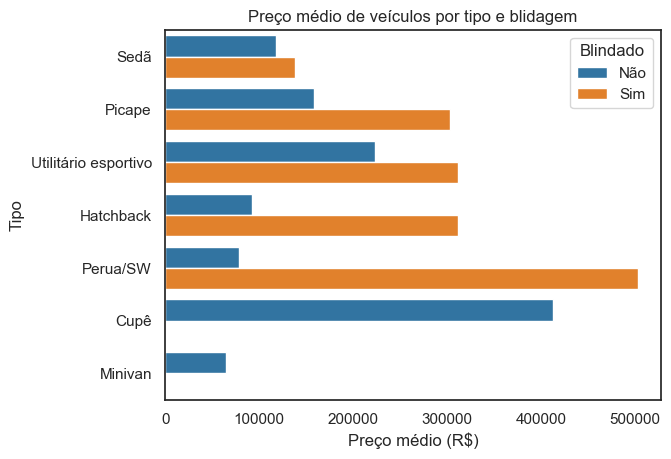

In [12]:
sns.barplot(data=cars_binary,
           y='tipo',
           x='preco', 
           hue='blindado',
           errorbar=None 
           )
plt.legend(title='Blindado',
          labels=['Não','Sim'])
plt.title('Preço médio de veículos por tipo e blidagem')
plt.xlabel('Preço médio (R$)')
plt.ylabel('Tipo')
plt.show()

### Resultado
Como mostra o gráfico, é possível validar a hipótese de que carros blindados têm um preço de venda maior do que veículos do mesmo tipo não blindados

---
## Hipótese 2 | Serviço de entrega e variação de preço
Para validar a hipótese de que o serviço de entrega não afeta no valor do carro será necessário realizar as seguintes etapas:
1. Remover outliers 
2. Dividir os carros em suas categorias
3. Dividir cada categoria entre os carros que têm serviço de entrega e os que não têm
4. Plotar o preço médio dos carros que têm ou não o serviço de delivery para cada categoria
5. Avaliar se, para todos os tipos, o preço com delivery é igual ao preço sem delivery

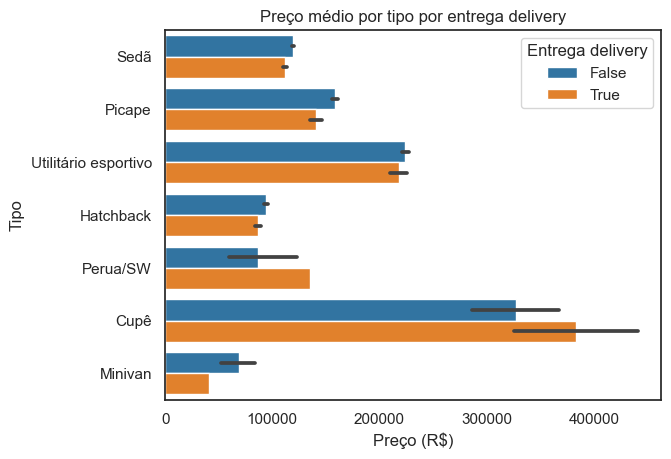

In [13]:
#Remover outliers que tenham preço superior a 4x a média dos preços
out_binary = cars_binary[cars_binary['preco'] <= cars_binary['preco'].mean()*4]
#Plotar gráfico
ax = sns.barplot(data=out_binary,
           y='tipo',
           x='preco',
           hue='entrega_delivery',
           estimator='mean')
plt.legend(title='Entrega delivery')
plt.xlabel('Preço (R$)')
plt.ylabel('Tipo')
plt.title('Preço médio por tipo por entrega delivery')
plt.show()

### Resultado
Como é possível observar no gráfico, a hipótese não é verdadeira para todos os tipo. O preço médio dos carros com delivery é maior do que sem delivery para as categorias: Peru/SW e Cupê. Para as outras categorias, o preço médio dos carros sem o delivery é maior do que para carros com delivery.

Chega-se à conclusão de que o serviço de delivery não é um serviço que se vale investir para aumentar o preço de revenda dos carros. Pode ser uma maneira de aumentar a satisfação do cliente e o NPS, mas não é um serviço que tenha influência direta nos ganhos com a venda de carros.

---
## Hipótese 3 | Veículos de único dono e revisão
Para validar a hipótese de que os veículos de único dono tendem a ter suas revisões feitas em concessionária e que isso aumenta o valor de venda do carro, será necessário realizar as seguintes etapas:
1. Criar uma crosstable, que consiste em uma tabela de correlação entre duas variáveis
2. Plotar os resultados da crosstable para observar se há diferençana proporção de carros com as revisões em concessionária quando alterado o número de donos
3. Plotar um gráfico de preço médio para cada combinação de variáveis possível
4. Analisar se há variação de preço médio quando alterada uma única variável

In [14]:
#Criar crosstable
crosstable = pd.crosstab(cars_binary['veiculo_único_dono'],cars_binary['revisoes_concessionaria'])
crosstable['porcentagem'] = round(crosstable.iloc[1]/(crosstable.iloc[0]+crosstable.iloc[1])*100,2)
crosstable['inv_porcentagem'] = 100 - crosstable['porcentagem']
crosstable

revisoes_concessionaria,0,1,porcentagem,inv_porcentagem
veiculo_único_dono,,,,
0,15447,3714,24.32,75.68
1,4965,5458,59.51,40.49


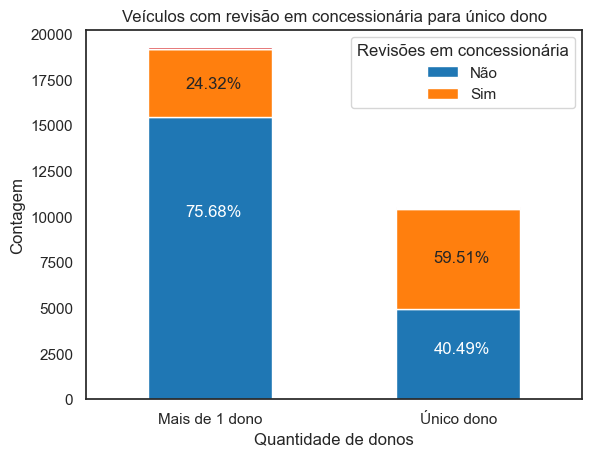

In [15]:
#Plotar dados da crosstable
ax = crosstable.plot(kind='bar',
                rot=0,
                stacked=True,
                title='Veículos com revisão em concessionária para único dono'
               )
#Anotar porcentagens
plt.annotate(f'{crosstable.iloc[0,2]}%',(-0.1,17000))
plt.annotate(f'{crosstable.iloc[0,3]}%',(-0.1,10000),c='white')
plt.annotate(f'{crosstable.iloc[1,2]}%',(0.9,7500))
plt.annotate(f'{crosstable.iloc[1,3]}%',(0.9,2500),c='white')

#Alterar legenda e labels
plt.xticks(ticks=[1,0],
           labels=['Único dono','Mais de 1 dono']
          )
ax.legend(title='Revisões em concessionária',
          labels=['Não','Sim']
         )
plt.xlabel('Quantidade de donos')
plt.ylabel('Contagem')
plt.show()

### Resultado | Revisões feitas em concessionária
Como é possível observar no gráfico acima, há variação da proporção de veículos que fazem revisão em concessionária quando alterado o número de donos que o veículo teve. Entre os veículos listados, daqueles que tiveram apenas 1 único dono, **59.5%** tiveram suas revisões realizadas em concessionária. Quando observada a mesma métrica para veículos de mais de 1 dono, o proporção de veículos que tiveram suas revisões realizadas em concessíonária cai para **24.3%**

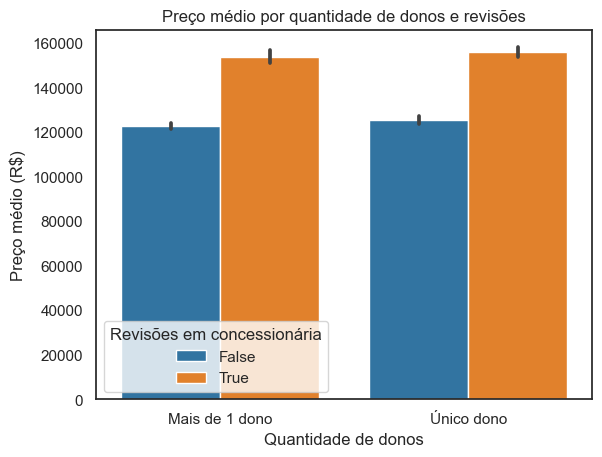

In [16]:
#Plotar relações
ax = sns.barplot(data=cars_binary,
            x='veiculo_único_dono',
            y='preco',
            hue='revisoes_concessionaria',
            order=[False,True],
            hue_order=[False,True]
           )
plt.title('Preço médio por quantidade de donos e revisões')
plt.xticks(ticks=[0,1],
           labels=['Mais de 1 dono','Único dono']
          )
ax.legend(title='Revisões em concessionária')
plt.xlabel('Quantidade de donos')
plt.ylabel('Preço médio (R$)')
plt.show()

### Resultado | Aumento do preço médio
Quando comparados os preços médios entre as 4 combinações possíveis, há uma clara diferença no preço médio entre veículos cujas revisões foram feitas em concessionárias e aqueles que não passaram por revisão somente em concessionária. Esse comportamento é verdadeiro tanto para carros de único dono quanto para carros de mais de um dono.

### Resultado | Validação da hipótese
A hipótese de que carros de único dono tendem a ter suas revisões feitas em concessionária foi validada pelo exploração realizada, a maioria dos veículos de único dono tiveram suas revisões realizadas em concessionárias. A hipótese de que carros que realizam revisões em concessionária têm o preço de venda mais alto também foi validada pela análise feita. No entanto, não é possível observar relação causal entre as variáveis, uma vez que o preço médio de carros que realizam revisões em concessionárias é mais alto independentemente de o veículo ser de único dono ou não.

---
## Melhor estado para se vender um carro de marca popular
Para responder à pergunta "Qual é o melhor estado para se vender um carro de marca popular e por quê?" será necessário atuar em duas diferentes etapas: definição das marcas populares e definição do melhor estado. Cada etapa com seu detalhamento próprio:
### Definir as marcas populares
1. Agrupar todos os carros por marca
2. Calcular a quantidade e preço médio de cada marca
3. Ordernar as marcas pela quantidade de carros em ordem decrescente
4. Selecionar as 15 marcas com mais carros registrados na base de dados
5. Ordenar as 15 marcas com mais carros por preço médio, em ordem crescente
6. Selecionar as 8 marcas com o preço médio mais baixo
7. Criar lista com os nomes das 8 marcas selecionadas

### Definir o melhor estado para venda
1. Selecionar apenas os carros das marcas populares definidas anteriormente
2. Calcular a média nacional de carros de marcas populares
3. Agrupar os carros por estado
4. Calcular o preço médio e quantidade de carros de marcas populares em cada estado
5. Selecionar os estado cujo preço médio é mais alto que a média nacional
6. Ordenar os estados por quantidade de carros, em ordem crescente
7. Observar qual é o estado com menos carros de marcas populares

In [17]:
#Agrupar carros por marca e calcular preço médio e quantidade
marcas_pop = cars.groupby('marca')['preco'].agg(['mean','count'])
marcas_pop.reset_index(inplace=True)
#Ordenar marcas pela quantidade de carros
order_marcas_pop = marcas_pop.sort_values(by=['count','mean'],ascending=(False,True))
order_marcas_pop.reset_index(inplace=True)
order_marcas_pop.drop('index', axis=1, inplace=True)
# Selecionar as 15 marcas com mais carros 
marcas15 = order_marcas_pop.iloc[:15]
#Ordenar marcas pelo preço médio dos carros
marcas15_preco = marcas15.sort_values(by=['mean'], ascending=True)
#Selecionar as 8 marcas com o preço médio mais baixo
marcas_populares = marcas15_preco.iloc[:8]
display(marcas_populares)
#Cria lista com nomes das marcas
list_marcas_populares = list(marcas_populares['marca'])

,marca,mean,count
14,RENAULT,82649.368865,538
3,HYUNDAI,84419.639625,2043
1,CHEVROLET,93187.683964,3020
5,FIAT,99711.164582,1918
9,HONDA,100620.715073,1586
0,VOLKSWAGEN,117940.087380,4594
8,PEUGEOT,122797.835086,1675
11,FORD,127453.062261,1060


In [18]:
#Selecionar carros que a marca seja uma das 8 selecionadas
carros_populares = cars[cars['marca'].isin(list_marcas_populares)]
#Calcular preço médio nacional das marcas populares
preco_medio_popular = carros_populares['preco'].mean()
print(f'Preço médio nacional de picapes automáticas: R${round(preco_medio_popular,2)}')

Preço médio nacional de picapes automáticas: R$105378.81


In [19]:
pop_estados = carros_populares.groupby('estado_vendedor')['preco'].agg(['mean','count'])
pop_estados.sort_values(by='mean', ascending=False)

,mean,count
estado_vendedor,,
Piauí (PI),177119.450853,6
Sergipe (SE),144638.986854,7
Mato Grosso (MT),139138.064887,30
Goiás (GO),126202.866906,441
Maranhão (MA),121041.689127,7
Rondônia (RO),118363.820745,4
Tocantins (TO),117700.458219,17
Pará (PA),117626.699148,68
Paraná (PR),114432.458949,1333


In [20]:
#Selecionar os estados com preço médio acima da média nacional
estado_acima_pop = pop_estados[pop_estados['mean']>= preco_medio_popular]
display(estado_acima_pop.sort_values('count', ascending=True))
#Ordenar os estados de acordo com o número de carros registrados
melhor_pop = estado_acima_pop\
                .reset_index()\
                .sort_values('count', ascending=True)\
                .iloc[0]#Seleciona apenas o primeiro estado da lista ordenada
print(f'O melhor estado para se vender um carro de marca popular é o estado de {melhor_pop["estado_vendedor"]}')

,mean,count
estado_vendedor,,
Rondônia (RO),118363.820745,4
Piauí (PI),177119.450853,6
Maranhão (MA),121041.689127,7
Sergipe (SE),144638.986854,7
Tocantins (TO),117700.458219,17
Mato Grosso (MT),139138.064887,30
Pará (PA),117626.699148,68
Rio Grande do Norte (RN),106911.914379,68
Alagoas (AL),114189.266330,100


O melhor estado para se vender um carro de marca popular é o estado de Rondônia (RO)


### Resultado

Observa-se, portanto, que **Rondônia (RO)** é o melhor estado para se vender um carro de marca popular.

---
## Melhor estado para se comprar picape automática
Para responder à pergunta "Qual é o melhor estado para se comprar uma picape com transmissão automática e por quê?" será necessário realizar algumas etapas:
1. Selecionar somente os carros do tipo Picape e transmissão automática
2. Agrupar os carros selecionados na etapa anterior por estado
3. Calcular a média de preço para todos os carros picapes automáticos listados
4. Selecionar os estados com preço médio abaixo da média nacional de picapes automáticas
5. Ordernar os estados por número de picapes automáticas listadas
6. Oberservar qual é o estado com mais picapes automáticas listadas entre os estados com preço médio inferior à média nacional

In [21]:
#Selecionar apenas os carros picape de transmissão automática
picape_automatica = cars[(cars['tipo']=='Picape') & (cars['cambio']=='Automática')]
#Separar por estados
picape_estados = picape_automatica.groupby('estado_vendedor')['preco'].agg(['mean','count'])
picape_estados.sort_values(by=['mean'], ascending=True)

,mean,count
estado_vendedor,,
Paraíba (PB),93157.035264,4
Mato Grosso do Sul (MS),144700.247621,5
Acre (AC),145256.693656,6
Rio Grande do Norte (RN),179961.694768,1
Rio de Janeiro (RJ),181660.344685,318
Santa Catarina (SC),185848.618546,283
Tocantins (TO),187717.127524,3
São Paulo (SP),188427.484638,1712
Pernambuco (PE),192566.764505,14


In [22]:
preco_medio_picape = picape_automatica["preco"].mean()
print(f'Preço médio nacional de picapes automáticas: R${round(preco_medio_picape,2)}')

Preço médio nacional de picapes automáticas: R$190559.3


In [23]:
#Selecionar os estados com preço médio abaixo da média nacional
estado_abaixo_media = picape_estados[picape_estados['mean']<=picape_automatica["preco"].mean()]
display(estado_abaixo_media.sort_values('count', ascending=False))
#Ordenar os estados de acordo com o número de carros registrados
melhor_estado = estado_abaixo_media\
                .reset_index()\
                .sort_values('count', ascending=False)\
                .iloc[0]#Seleciona apenas o primeiro estado da lista ordenada
print(f'O melhor estado para se comprar uma picape de transmissão automática é o estado de {melhor_estado["estado_vendedor"]}')

,mean,count
estado_vendedor,,
São Paulo (SP),188427.484638,1712
Rio de Janeiro (RJ),181660.344685,318
Santa Catarina (SC),185848.618546,283
Acre (AC),145256.693656,6
Mato Grosso do Sul (MS),144700.247621,5
Paraíba (PB),93157.035264,4
Tocantins (TO),187717.127524,3
Rio Grande do Norte (RN),179961.694768,1


O melhor estado para se comprar uma picape de transmissão automática é o estado de São Paulo (SP)


### Resultado

Observa-se, portanto, que **São Paulo (SP)** é o melhor estado para se comprar uma picape de transmissão automática.

---
## Melhor estado para se comprar carro que esteja na garantia de fábrica
Para responder à pergunta "Qual é o melhor estado para se comprar carros que ainda estejam na garantia de fábrica  e por quê?" será necessário realizar algumas etapas:
1. Selecionar somente os carros que estão na garantia de fábrica
2. Agrupar os carros selecionados na etapa anterior por estado
3. Calcular a média de preço para todos os carros na garantia listados
4. Selecionar os estados com preço médio abaixo da média nacional de carros na garantia
5. Ordernar os estados por número de carros na garantia listados
6. Oberservar qual é o estado com mais carros na garantia listados entre os estados com preço médio inferior à média nacional

In [24]:
#Selecionar apenas os carros na garantia
garantia = cars_binary[(cars_binary['garantia_de_fábrica']==True)]
#Separar por estados
garantia_estados = garantia.groupby('estado_vendedor')['preco'].agg(['mean','count'])
garantia_estados.sort_values(by=['mean'], ascending=True)

,mean,count
estado_vendedor,,
Paraíba (PB),95762.746630,1
Pará (PA),98156.615283,17
Amazonas (AM),99617.303347,9
Espírito Santo (ES),104030.208116,9
Mato Grosso do Sul (MS),121709.589845,13
Ceará (CE),123939.878795,1
Rio Grande do Norte (RN),133120.393894,9
Pernambuco (PE),149898.416932,20
Acre (AC),150416.911346,2


In [25]:
preco_medio_garantia = garantia["preco"].mean()
print(f'Preço médio nacional de carros na garantia de fábrica: R${round(preco_medio_garantia,2)}')

Preço médio nacional de carros na garantia de fábrica: R$168993.14


In [26]:
#Selecionar os estados com preço médio abaixo da média nacional
garantia_abaixo_media = garantia_estados[garantia_estados['mean']<=garantia["preco"].mean()]
display(garantia_abaixo_media.sort_values('count', ascending=False))
#Ordenar os estados de acordo com o número de carros registrados
melhor_estado_garantia = garantia_abaixo_media\
                        .reset_index()\
                        .sort_values('count', ascending=False)\
                        .iloc[0]#Seleciona apenas o primeiro estado da lista ordenada
print(f'O melhor estado para se comprar um carro na garantia de fábrica é o estado de {melhor_estado_garantia["estado_vendedor"]}')

,mean,count
estado_vendedor,,
São Paulo (SP),166751.081004,2307
Minas Gerais (MG),161206.273890,264
Alagoas (AL),154268.676544,58
Bahia (BA),165221.236199,51
Pernambuco (PE),149898.416932,20
Pará (PA),98156.615283,17
Mato Grosso do Sul (MS),121709.589845,13
Amazonas (AM),99617.303347,9
Espírito Santo (ES),104030.208116,9


O melhor estado para se comprar um carro na garantia de fábrica é o estado de São Paulo (SP)


### Resultado

Observa-se, portanto, que **São Paulo (SP)** é o melhor estado para se comprar um carro na garantia.